## Analysis for Lysozyme in Water simulation

A notebook for generating plots from the [Lysozyme in Water](http://www.mdtutorials.com/gmx/lysozyme/index.html) GROMACS tutorial by Justin A. Lemkul.

GROMACS provides output in .xvg files. A python script from the [kulasinki/python-for-gromacs repo](https://github.com/kulasinski/python-for-gromacs) used to convert .xvg files into .csv files.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

#setting style for plots
plt.rcParams.update({'font.size': 16})
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.xmargin'] = 0

### Potential - Energy Minimization

In [2]:
potential = pd.read_csv(r"E:\TKC_lab_stuff\Simulations\gmx_lysozyme_tut\potential.csv")

In [3]:
potential

,Time (ps),Potential
0,0.0,-332332.18750
1,1.0,-348403.28125
2,2.0,-370750.12500
3,3.0,-399193.21875
4,4.0,-427629.53125
...,...,...
649,820.0,-586971.56250
650,821.0,-586983.56250
651,822.0,-586993.43750
652,823.0,-586997.56250


Text(0.5, 1.08, 'Energy Minimisation')

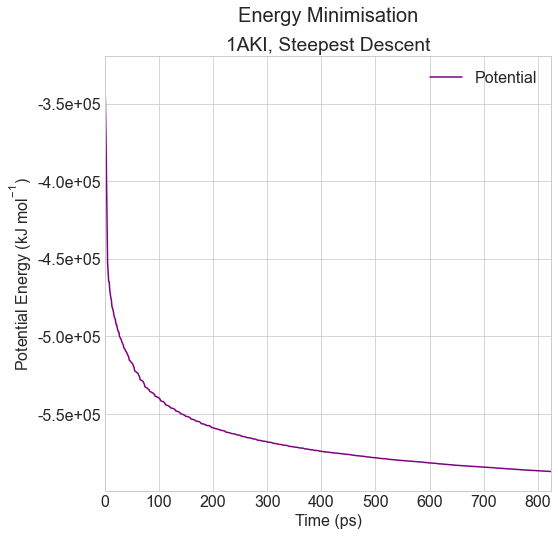

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(potential["Time (ps)"], potential["Potential"], 'purple', label='Potential')
ax.legend()
#setting the y-axis to use scientific notation
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

ax.set(xlabel='Time (ps)', ylabel='Potential Energy (kJ $\mathregular{mol^{-1}}$)', title = '1AKI, Steepest Descent')
ax.annotate('Energy Minimisation', xy=(0.5, 1.08),  xycoords='axes fraction', ha='center', fontsize = 20)


### Temperature

In [5]:
temp = pd.read_csv(r"E:\TKC_lab_stuff\Simulations\gmx_lysozyme_tut\temperature.csv")


Text(0.5, 1.08, 'Temperature')

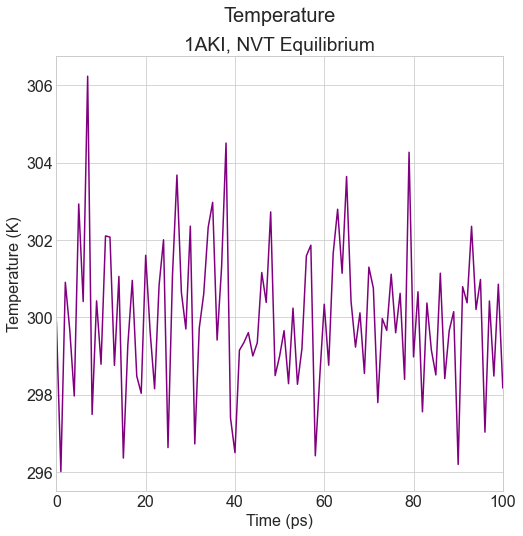

In [6]:
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.plot(temp["Time (ps)"], temp["Temperature"], 'purple', label='Temperature')
ax1.set(xlabel='Time (ps)', ylabel='Temperature (K)', title = '1AKI, NVT Equilibrium')
ax1.annotate('Temperature', xy=(0.5, 1.08),  xycoords='axes fraction', ha='center', fontsize = 20)

### Pressure - NPT Equilibrium

In [7]:
pressure = pd.read_csv(r"E:\TKC_lab_stuff\Simulations\gmx_lysozyme_tut\pressure.csv")

In [8]:
pressure.head()

,Time (ps),Pressure
0,0.0,-459.181152
1,1.0,333.036224
2,2.0,-248.680588
3,3.0,78.314056
4,4.0,161.014664


In [9]:
#creates new column with average of the previous 10 entries
pressure["10 ps Running Avg"] = pressure["Pressure"].rolling(10).mean()
pressure

,Time (ps),Pressure,10 ps Running Avg
0,0.0,-459.181152,NaN
1,1.0,333.036224,NaN
2,2.0,-248.680588,NaN
3,3.0,78.314056,NaN
4,4.0,161.014664,NaN
...,...,...,...
96,96.0,-253.192825,-93.551421
97,97.0,258.964966,-70.032597
98,98.0,-10.453323,-94.206023
99,99.0,311.944733,-40.726706


Text(0.5, 1.08, 'Pressure')

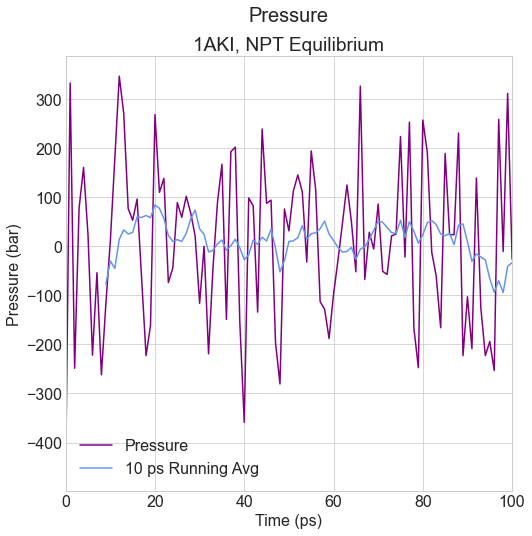

In [10]:
fig2, ax2 = plt.subplots(figsize=(8, 8))

ax2.plot(pressure["Time (ps)"], pressure["Pressure"], 'purple', label='Pressure')
ax2.plot(pressure["Time (ps)"], pressure["10 ps Running Avg"], 'cornflowerblue', label='10 ps Running Avg')
ax2.legend()

ax2.set(xlabel='Time (ps)', ylabel='Pressure (bar)', title = '1AKI, NPT Equilibrium')
ax2.annotate('Pressure', xy=(0.5, 1.08),  xycoords='axes fraction', ha='center', fontsize = 20)

### Density NPT equilibration


In [11]:
density = pd.read_csv(r"E:\TKC_lab_stuff\Simulations\gmx_lysozyme_tut\density.csv")

In [12]:
density.head()

,Time (ps),Density
0,0.0,994.001465
1,1.0,1013.908936
2,2.0,1012.503967
3,3.0,1017.297791
4,4.0,1023.163391


In [13]:
density["10 ps Running Avg"] = density["Density"].rolling(10).mean()

Text(0.5, 1.08, 'Density')

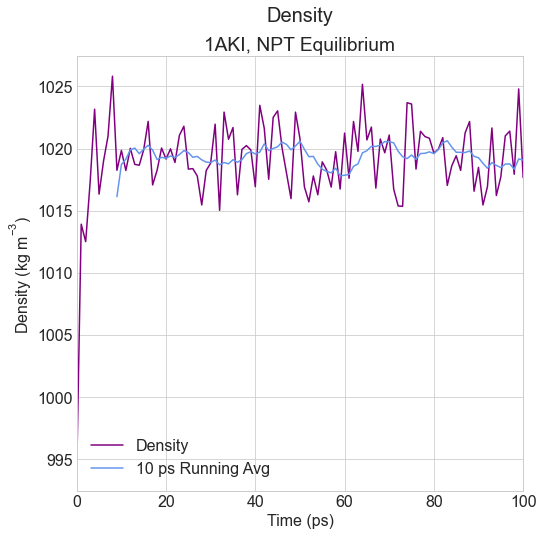

In [14]:
fig3, ax3 = plt.subplots(figsize=(8, 8))

ax3.plot(density["Time (ps)"], density["Density"], 'purple', label='Density')
ax3.plot(density["Time (ps)"], density["10 ps Running Avg"], 'cornflowerblue', label='10 ps Running Avg')
ax3.legend()

ax3.set(xlabel='Time (ps)', ylabel='Density (kg $\mathregular{m^{-3}}$)', title = '1AKI, NPT Equilibrium')
ax3.annotate('Density', xy=(0.5, 1.08),  xycoords='axes fraction', ha='center', fontsize = 20)

### RMSD

In [15]:
rmsd = pd.read_csv(r"E:\TKC_lab_stuff\Simulations\gmx_lysozyme_tut\rmsd.csv")
rmsd_x = pd.read_csv(r"E:\TKC_lab_stuff\Simulations\gmx_lysozyme_tut\rmsd_xtal.csv")

In [16]:
rmsd.head()

,Time (ps),fter lsq fit to Backbone
0,0.00,0.000484
1,0.01,0.063999
2,0.02,0.056197
3,0.03,0.050106
4,0.04,0.080157


In [17]:
rmsd_x.tail()

,Time (ps),fter lsq fit to Backbone
96,0.96,0.117534
97,0.97,0.112508
98,0.98,0.097818
99,0.99,0.112868
100,1.00,0.108119


Text(0.5, 1.08, 'RMSD')

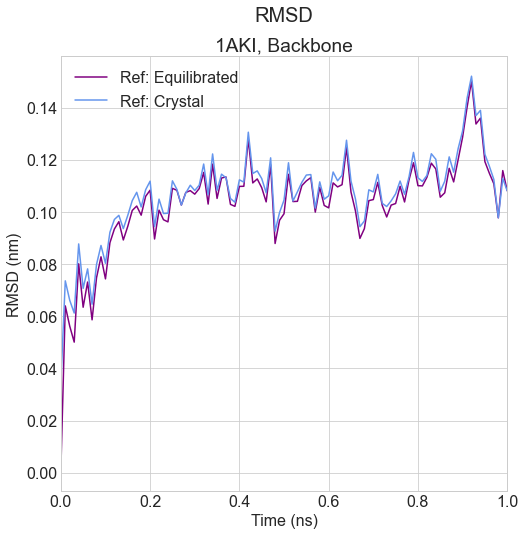

In [18]:
fig4, ax4 = plt.subplots(figsize=(8, 8))

ax4.plot(rmsd["Time (ps)"], rmsd["fter lsq fit to Backbone"], 'purple', label='Ref: Equilibrated')
ax4.plot(rmsd_x["Time (ps)"], rmsd_x["fter lsq fit to Backbone"], 'cornflowerblue', label='Ref: Crystal')
ax4.legend()

ax4.set(xlabel='Time (ns)', ylabel='RMSD (nm)', title = '1AKI, Backbone')
ax4.annotate('RMSD', xy=(0.5, 1.08),  xycoords='axes fraction', ha='center', fontsize = 20)

### Radius of gyration

In [19]:
gyrate = pd.read_csv(r"E:\TKC_lab_stuff\Simulations\gmx_lysozyme_tut\gyrate.csv")

In [20]:
gyrate.head()

,Time (ps),Rg,Rg\sX\N,Rg\sY\N,Rg\sZ\N
0,0,1.40948,1.20614,1.03245,1.20521
1,10,1.42276,1.21454,1.06435,1.20024
2,20,1.41980,1.20835,1.05152,1.21073
3,30,1.41607,1.20307,1.03763,1.21919
4,40,1.43791,1.22671,1.06288,1.22500


Text(0.5, 1.08, 'Radius of gyration')

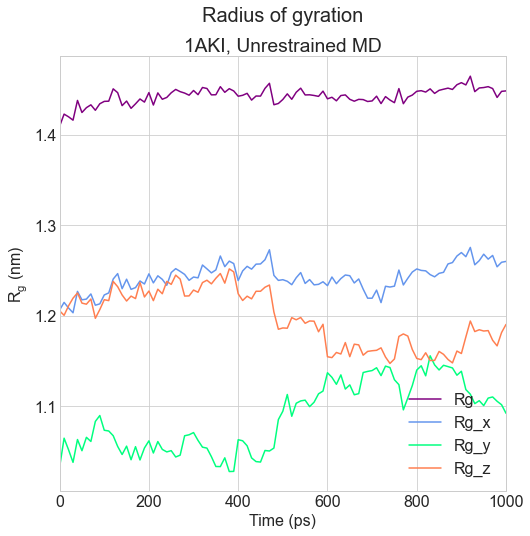

In [21]:
fig5, ax5 = plt.subplots(figsize=(8, 8))

ax5.plot(gyrate["Time (ps)"], gyrate["Rg"], 'purple', label='Rg')
ax5.plot(gyrate["Time (ps)"], gyrate[r'Rg\sX\N'], 'cornflowerblue', label='Rg_x')
ax5.plot(gyrate["Time (ps)"], gyrate[r"Rg\sY\N"], 'springgreen', label='Rg_y')
ax5.plot(gyrate["Time (ps)"], gyrate[r"Rg\sZ\N"], 'coral', label='Rg_z')

ax5.legend()

ax5.set(xlabel='Time (ps)', ylabel='$\mathregular{R_g}$ (nm)', title = '1AKI, Unrestrained MD')
ax5.annotate('Radius of gyration', xy=(0.5, 1.08),  xycoords='axes fraction', ha='center', fontsize = 20)